### Домашнее задание к лекции «Корреляция и корреляционный анализ»

Домашнее задание к лекции «Корреляция и корреляционный анализ»

Задание также доступно здесь http://prntscr.com/ujddtw

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\Ryzen\\Desktop\\DataSet\\Data Analyst\\15_Correlation_analysis\\water.csv', sep = ",")
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


#### Задание 1.
#### Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

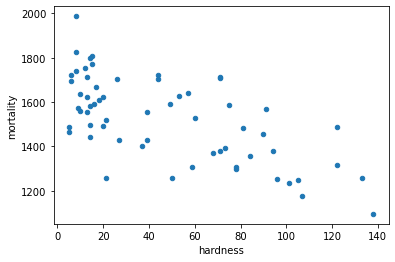

In [4]:
# Построить точечный график:
df.plot(kind='scatter', x='hardness', y='mortality')

In [5]:
# Рассчитать коэффициенты корреляции Пирсона и Спирмена
df[['hardness', 'mortality']].corr(method='pearson')

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [7]:
# Построить модель линейной регрессии:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = df[['hardness']]
y = df['mortality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_train.shape

(42, 1)

In [11]:
y_train.shape

(42,)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.coef_

array([-3.13167087])

In [14]:
model.intercept_

1668.9722977277095

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [16]:
# Рассчитать коэффициент детерминации:

In [17]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

In [18]:
# Вывести график остатков:

Text(0, 0.5, 'Средняя годовая смертность')

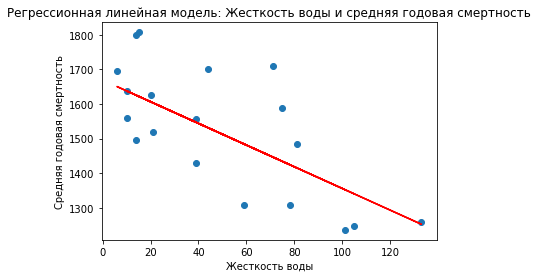

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title("Регрессионная линейная модель: Жесткость воды и средняя годовая смертность")
plt.xlabel("Жесткость воды")
plt.ylabel("Средняя годовая смертность")

### Доработка:
#### Юг + Север: график и гистограмма регрессионных остатков
Построить графики остатков (по оси X берется разница test и prediction, а по оси Y - prediction)


Text(0, 0.5, 'Предсказанные значения средней годовой смертности')

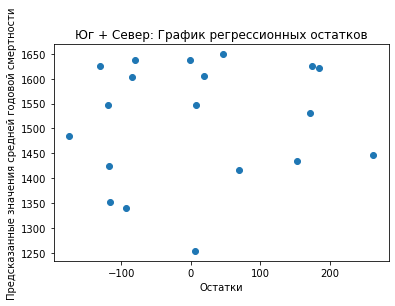

In [20]:
residuals = y_test - y_pred
plt.scatter(residuals, y_pred)
plt.title("Юг + Север: График регрессионных остатков")
plt.xlabel("Остатки")
plt.ylabel("Предсказанные значения средней годовой смертности")

Text(0, 0.5, 'Частотность попадания в интервал')

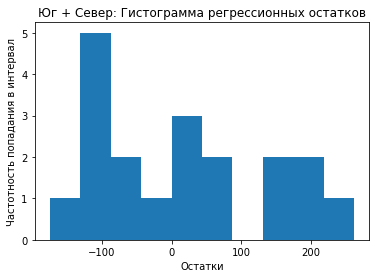

In [21]:
plt.hist(residuals)
plt.title("Юг + Север: Гистограмма регрессионных остатков")
plt.xlabel("Остатки")
plt.ylabel("Частотность попадания в интервал")

### Выводы по пункту 1:
#### Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

С ростом жесткости воды c 20 до 120 единиц, смертность снижается с 1625 до 1300 единиц. Или с ростом жесткости воды на каждые 20 единиц средняя годовая смертность снижается на 65 единиц. Коэффициенты корреляции выше 0.60, что указывает на средний уровень взаимосвязи между исследуемыми параметрами.
Таким образом, можно сделать вывод, что наблюдается со-зависимость между значениями велечин жёсткости воды и средней годовой смертностью.

#### Задание 2.
#### Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [22]:
# Разделить данные на 2 группы:

In [23]:
# Южные города:
South_df = df.loc[df['location'] == 'South']
South_df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [24]:
South_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [25]:
# Северные города:
North_df = df.loc[df['location'] == 'North']
North_df.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


In [26]:
North_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


In [27]:
# Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

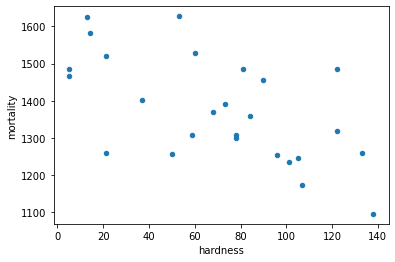

In [28]:
# Юг: Построить точечный график:
South_df.plot(kind='scatter', x='hardness', y='mortality')

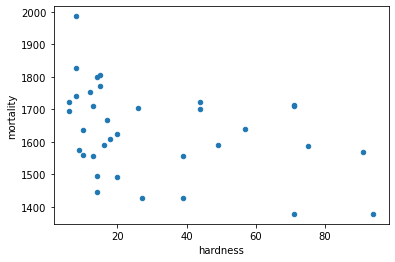

In [29]:
# Север: Построить точечный график:
North_df.plot(kind='scatter', x='hardness', y='mortality')

In [30]:
# Юг: корреляция датафрейма
South_df.corr()

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.396333,-0.005337
mortality,0.396333,1.000000,-0.602153
hardness,-0.005337,-0.602153,1.000000


In [31]:
# Юг: Рассчитать коэффициенты корреляции Спирмена
South_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


### Юг: Вывод о Корелляции:
Коэффициенты корреляции 0.6, что указывает на средний уровень взаимосвязи исследуемых параметров

In [32]:
# Север: корреляция датафрейма
North_df.corr()

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,-0.103548,0.309195
mortality,-0.103548,1.000000,-0.368598
hardness,0.309195,-0.368598,1.000000


In [33]:
# Север: Рассчитать коэффициенты корреляции Спирмена
North_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


### Север: Вывод о Корелляции:
Коэффициенты корреляции менее 0.4, что указывает на низкий уровень взаимосвязи исследуемых параметров

In [34]:
# Юг: Построить модель линейной регрессии:
X = South_df[['hardness']]
y = South_df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
X_train.shape

(18, 1)

In [36]:
y_train.shape

(18,)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
model.coef_

array([-3.51342921])

In [39]:
model.intercept_

1640.2204603423374

In [40]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [41]:
# Юг: Рассчитать коэффициент детерминации:
model.score(X_test, y_test)

-2.5519223012352077

### Юг: Вывод о коэффициенте детерминации:
отрицательный, это говорит о крайней неадекватности модели

Text(0, 0.5, 'Средняя годовая смертность')

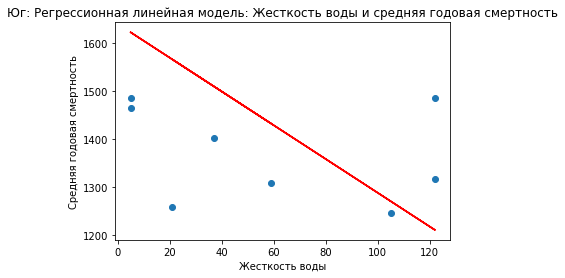

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title("Юг: Регрессионная линейная модель: Жесткость воды и средняя годовая смертность")
plt.xlabel("Жесткость воды")
plt.ylabel("Средняя годовая смертность")

### Доработка:
#### Юг: график и гистограмма регрессионных остатков
Построить графики остатков (по оси X берется разница test и prediction, а по оси Y - prediction)


Text(0, 0.5, 'Предсказанные значения средней годовой смертности')

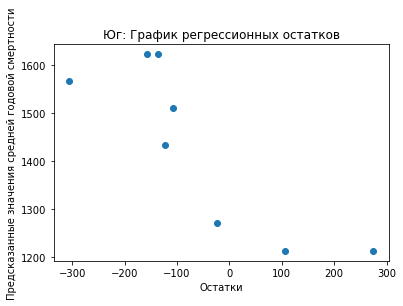

In [43]:
residuals = y_test - y_pred
plt.scatter(residuals, y_pred)
plt.title("Юг: График регрессионных остатков")
plt.xlabel("Остатки")
plt.ylabel("Предсказанные значения средней годовой смертности")

Text(0, 0.5, 'Частотность попадания в интервал')

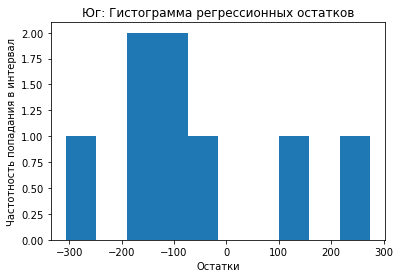

In [44]:
plt.hist(residuals)
plt.title("Юг: Гистограмма регрессионных остатков")
plt.xlabel("Остатки")
plt.ylabel("Частотность попадания в интервал")

In [45]:
# Север: Построить модель линейной регрессии:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.coef_

array([-3.13167087])

In [48]:
model.intercept_

1668.9722977277095

In [49]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [50]:
# Север: Рассчитать коэффициент детерминации:
model.score(X_test, y_test)

0.5046490611017092

### Север: Вывод о коэффициенте детерминации:
0.5 - это говорит о средней адекватности модели

Text(0, 0.5, 'Средняя годовая смертность')

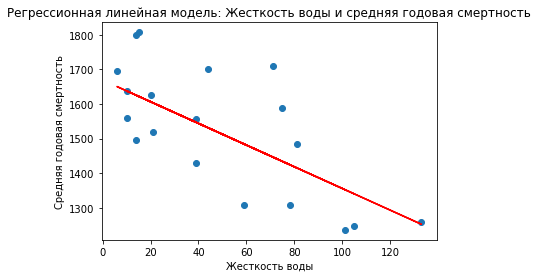

In [51]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title("Регрессионная линейная модель: Жесткость воды и средняя годовая смертность")
plt.xlabel("Жесткость воды")
plt.ylabel("Средняя годовая смертность")

### Итоговый вывод по пункту 2:
При использовании линейной модели регрессии, коэффициенты корреляции и детерминации указывают для:
- северных городов на СРЕДНИЙ уровень взаимосвязи исследуемых параметров и СРЕДНЮЮ АДЕКВАТНОСТЬ используемой модели при коэффициенте детерминации 0,50;
- южных городов на НИЗКИЙ уровень взаимосвязи исследуемых параметров и НЕАДЕКВАТНОСТЬ используемой модели при отрицательном коэффициенте детерминации -2,55

### Доработка:
#### Север: график и гистограмма регрессионных остатков
Построить графики остатков (по оси X берется разница test и prediction, а по оси Y - prediction)


Text(0, 0.5, 'Предсказанные значения средней годовой смертности')

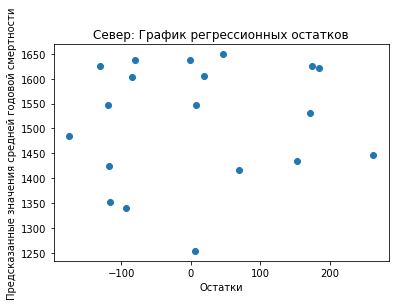

In [52]:
residuals = y_test - y_pred
plt.scatter(residuals, y_pred)
plt.title("Север: График регрессионных остатков")
plt.xlabel("Остатки")
plt.ylabel("Предсказанные значения средней годовой смертности")

Text(0, 0.5, 'Частотность попадания в интервал')

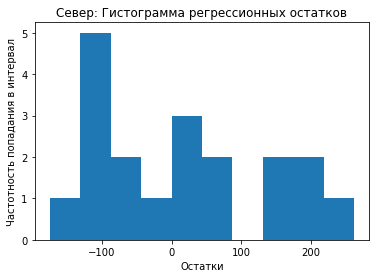

In [53]:
plt.hist(residuals)
plt.title("Север: Гистограмма регрессионных остатков")
plt.xlabel("Остатки")
plt.ylabel("Частотность попадания в интервал")